# Property Price Register - Machine Learning analysis

## Section 0 - Initial Preparation

### Section 0.1 - Import required modules

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Section 1 - Data Understanding and Preparation

### Section 1.x - Introduction

Our objective is to use a sample of the Residential Property Price Register (RPPR) to make inference about the price of houses in the Republic of Ireland. We will explore the dataset, transform the dataset appropriately, train various machine learning models using the dataset, validate these models, and perform tests for generalisability (how well does our final model predict house prices). 

Both the input and target features come from the RPPR, which is a dataset containing details of the sale of all residential properties purchased in Ireland since the 1st January 2010, as declared to the Revenue Commissioners for stamp duty purposes.

### Section 1.x - Read in the cleaned dataset

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,Date_of_Sale,Postal_Code,County,Price_€_VAT_incl,Description_of_Property,Property_Size_Description,Month_of_Sale,Quarter_of_Sale
0,2020-05-21,unknown,Roscommon,180000.0,Second-Hand Dwelling house /Apartment,unknown,May,2
1,2011-09-08,unknown,Kilkenny,73500.0,Second-Hand Dwelling house /Apartment,unknown,September,3
2,2021-09-24,dublin 15,Dublin,280000.0,Second-Hand Dwelling house /Apartment,unknown,September,3
3,2021-08-18,unknown,Louth,205000.0,Second-Hand Dwelling house /Apartment,unknown,August,3
4,2013-08-02,dublin 9,Dublin,282500.0,Second-Hand Dwelling house /Apartment,unknown,August,3


### Section 1.x: Change the data types

In [4]:
df.dtypes

Date_of_Sale                  object
Postal_Code                   object
County                        object
Price_€_VAT_incl             float64
Description_of_Property       object
Property_Size_Description     object
Month_of_Sale                 object
Quarter_of_Sale                int64
dtype: object

In [5]:
df["Price_€_VAT_incl"] = df["Price_€_VAT_incl"].astype(float)

In [6]:
df["Date_of_Sale"] = pd.to_datetime(df["Date_of_Sale"], format="%Y-%m-%d")

In [7]:
df["Quarter_of_Sale"] = df["Quarter_of_Sale"].astype("object")

In [8]:
# Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns

# Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

Date_of_Sale                 datetime64[ns]
Postal_Code                        category
County                             category
Price_€_VAT_incl                    float64
Description_of_Property            category
Property_Size_Description          category
Month_of_Sale                      category
Quarter_of_Sale                    category
dtype: object

### Section 1.x - Shuffle dataset rows and split dataset into separate training and test datasets

The training dataset will be used for model construction and validation. The test dataset will be used at the very end of our analysis to test the generalisability of our final model.

In [9]:
X = df.drop(["Price_€_VAT_incl", "Date_of_Sale"], axis=1)
y = df["Price_€_VAT_incl"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [10]:
X_train.head()

,Postal_Code,County,Description_of_Property,Property_Size_Description,Month_of_Sale,Quarter_of_Sale
9249,unknown,Cork,Second-Hand Dwelling house /Apartment,unknown,September,3
984,unknown,Wicklow,Second-Hand Dwelling house /Apartment,unknown,April,2
7192,unknown,Meath,Second-Hand Dwelling house /Apartment,unknown,November,4
754,unknown,Cork,Second-Hand Dwelling house /Apartment,unknown,March,1
8760,dublin 9,Dublin,Second-Hand Dwelling house /Apartment,unknown,October,4


In [11]:
X_test.head()

,Postal_Code,County,Description_of_Property,Property_Size_Description,Month_of_Sale,Quarter_of_Sale
3558,unknown,Limerick,Second-Hand Dwelling house /Apartment,unknown,September,3
1422,unknown,Cork,Second-Hand Dwelling house /Apartment,unknown,November,4
7221,unknown,Kildare,Second-Hand Dwelling house /Apartment,unknown,December,4
6699,unknown,Westmeath,Second-Hand Dwelling house /Apartment,unknown,July,3
309,dublin 18,Dublin,Second-Hand Dwelling house /Apartment,unknown,June,2


### Section 1.x: Categorical feature plots

#### Postal_Code vs Price 

<Figure size 432x288 with 0 Axes>

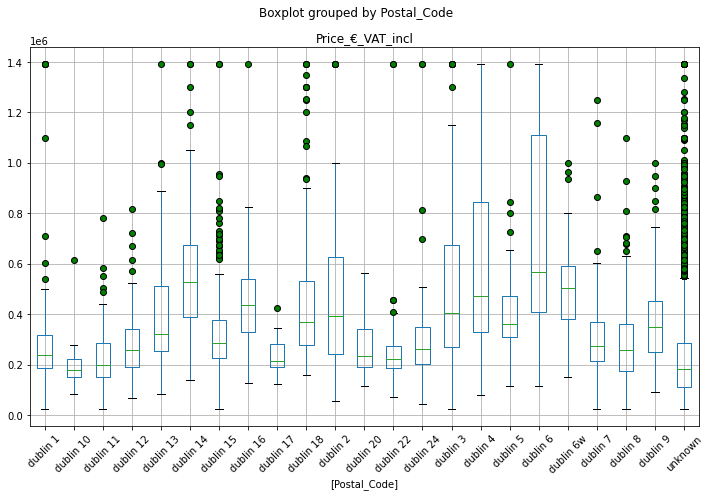

In [12]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Postal_Code'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### County vs Price

<Figure size 432x288 with 0 Axes>

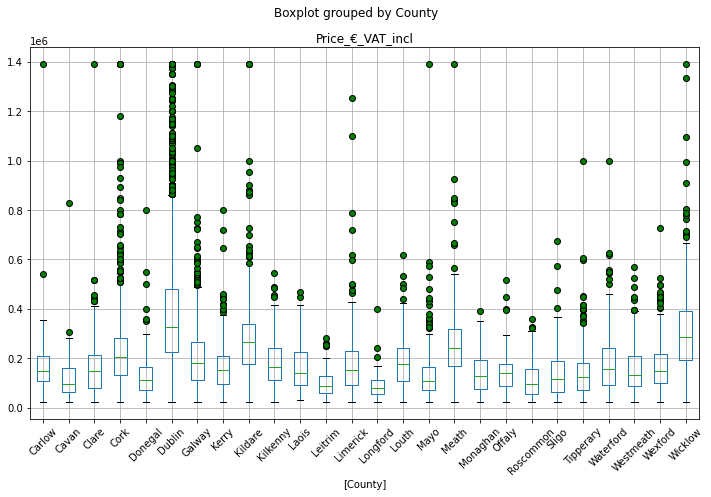

In [13]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['County'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### Description of Property vs Price

<Figure size 432x288 with 0 Axes>

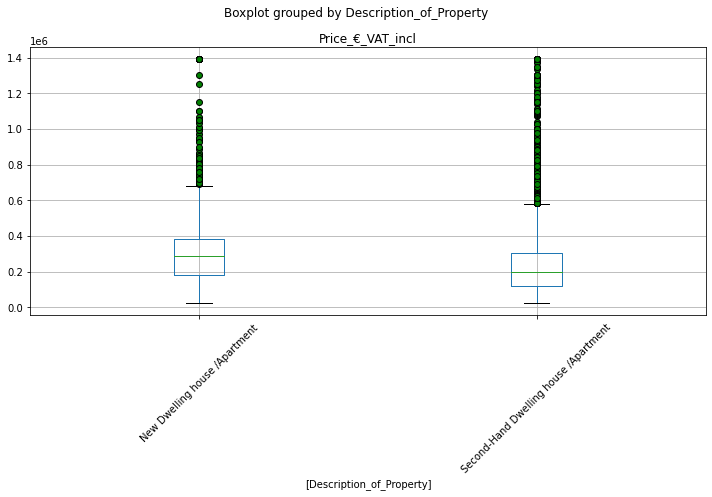

In [14]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Description_of_Property'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### Property Size Description vs Price

<Figure size 432x288 with 0 Axes>

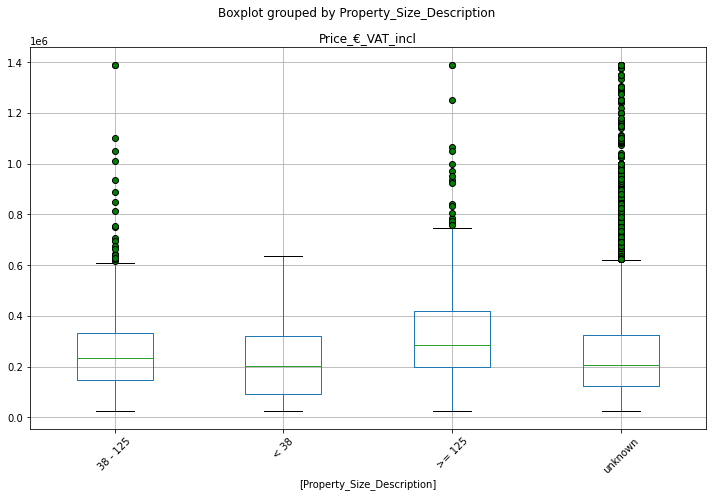

In [15]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Property_Size_Description'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### Month of Sale vs Price

<Figure size 432x288 with 0 Axes>

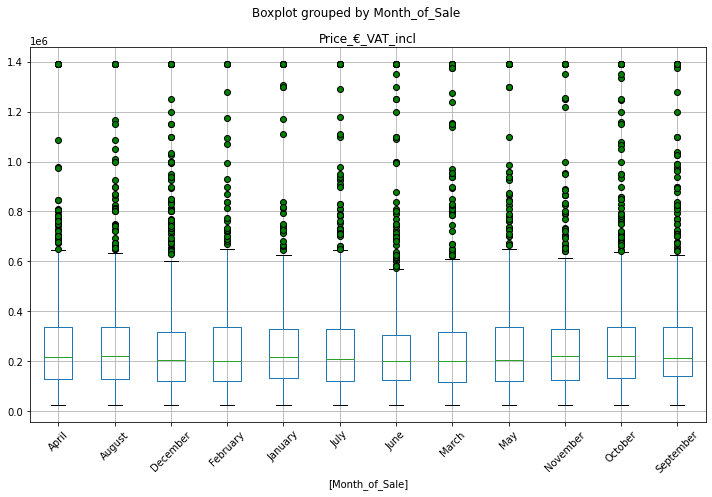

In [16]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Month_of_Sale'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### Quarter of Sale vs Price

<Figure size 432x288 with 0 Axes>

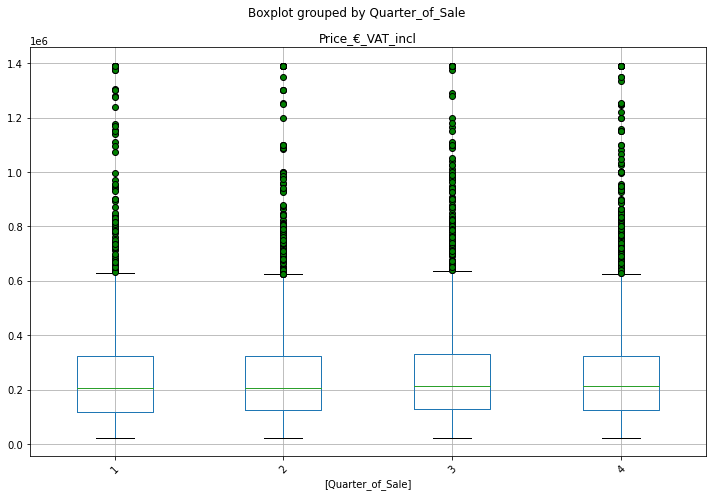

In [17]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Quarter_of_Sale'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation=45);
plt.tight_layout()

#### Observations

All features seem as though they have some relationship with the price feature (with the exception of month of sale and quarter of sale. The distribution of price values does not appear to vary according as month/quarter varies)

#### Drop unused features

In [18]:
X_train.drop(["Month_of_Sale", "Quarter_of_Sale"], axis=1, inplace=True)
X_test.drop(["Month_of_Sale", "Quarter_of_Sale"], axis=1, inplace=True)

### Section 1.x - Reencode categorical variables

In [19]:
category_columns = X_train.select_dtypes(['category']).columns

for each in category_columns:
    dummies = pd.get_dummies(X_train[each], prefix=each, drop_first = False)
    X_train = pd.concat([X_train, dummies], axis=1)
X_train = X_train.drop(category_columns, axis=1)

for each in category_columns:
    dummies = pd.get_dummies(X_test[each], prefix=each, drop_first = False)
    X_test = pd.concat([X_test, dummies], axis=1)
X_test = X_test.drop(category_columns, axis=1)

In [20]:
X_train.columns

Index(['Postal_Code_dublin 1', 'Postal_Code_dublin 10',
       'Postal_Code_dublin 11', 'Postal_Code_dublin 12',
       'Postal_Code_dublin 13', 'Postal_Code_dublin 14',
       'Postal_Code_dublin 15', 'Postal_Code_dublin 16',
       'Postal_Code_dublin 17', 'Postal_Code_dublin 18',
       'Postal_Code_dublin 2', 'Postal_Code_dublin 20',
       'Postal_Code_dublin 22', 'Postal_Code_dublin 24',
       'Postal_Code_dublin 3', 'Postal_Code_dublin 4', 'Postal_Code_dublin 5',
       'Postal_Code_dublin 6', 'Postal_Code_dublin 6w', 'Postal_Code_dublin 7',
       'Postal_Code_dublin 8', 'Postal_Code_dublin 9', 'Postal_Code_unknown',
       'County_Carlow', 'County_Cavan', 'County_Clare', 'County_Cork',
       'County_Donegal', 'County_Dublin', 'County_Galway', 'County_Kerry',
       'County_Kildare', 'County_Kilkenny', 'County_Laois', 'County_Leitrim',
       'County_Limerick', 'County_Longford', 'County_Louth', 'County_Mayo',
       'County_Meath', 'County_Monaghan', 'County_Offaly', 'County

In [21]:
X_train.dtypes

Postal_Code_dublin 1                                             uint8
Postal_Code_dublin 10                                            uint8
Postal_Code_dublin 11                                            uint8
Postal_Code_dublin 12                                            uint8
Postal_Code_dublin 13                                            uint8
Postal_Code_dublin 14                                            uint8
Postal_Code_dublin 15                                            uint8
Postal_Code_dublin 16                                            uint8
Postal_Code_dublin 17                                            uint8
Postal_Code_dublin 18                                            uint8
Postal_Code_dublin 2                                             uint8
Postal_Code_dublin 20                                            uint8
Postal_Code_dublin 22                                            uint8
Postal_Code_dublin 24                                            uint8
Postal

## Section 2: Linear Regression

### Section 2.x: Train a linear regression model

In [22]:
# Train, aka fit, a model using all continuous features.
linreg = LinearRegression().fit(X_train, y_train)

# Print the weights learned for each feature.
print("\nCoeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)


Coeficients: 
 [-1.31995827e+17 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17
 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17
 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17
 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17
 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17
 -1.31995827e+17 -1.31995827e+17 -1.31995827e+17  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18  1.19578752e+18  1.19578752e+18  1.19578752e+18
  1.19578752e+18 -1.60968150e+18 -1.60968150e+18  1.43688839e+18
  1.43688839e+18  1.43688839e+18  1.43688839e+18]

Intercept: 
 -8.909985743723323e+17


In [23]:
(pd.DataFrame({'coef':linreg.coef_, 'category':X_train.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
Property_Size_Description_unknown,1.436888e+18
Property_Size_Description_>= 125,1.436888e+18
Property_Size_Description_38 - 125,1.436888e+18
Property_Size_Description_< 38,1.436888e+18
County_Dublin,1.195788e+18
County_Wicklow,1.195788e+18
County_Kildare,1.195788e+18
County_Meath,1.195788e+18
County_Cork,1.195788e+18


### Section 2.x: Interpretation of linear regression model

### Section 2.x: Training set predictions

In [33]:
## Get the predictions from the first 10 training examples
first_10_x = X_train.head(10)

In [34]:
linreg.predict(first_10_x)

array([221184., 313856., 242176., 221184., 367872., 150528., 215040.,
       377088., 221184., 184064.])

In [35]:
y_train.head(10)

9249    206000.0
984     352000.0
7192    265000.0
754     230000.0
8760    260000.0
4716     66500.0
8864    100760.0
83      259999.0
5311     82500.0
5117    152000.0
Name: Price_€_VAT_incl, dtype: float64

Observations: Based on the first 10 rows of training data, our model seems to be able to predict some property prices reasonably accurately (within €10,000/€20,000). However, some predictions are inaccurate (> €100,000), which we deem unacceptable

In [49]:
linreg_train_predictions = linreg.predict(X_train)
print(f"R2 Score: {r2_score(y_train, linreg_train_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, linreg_train_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, linreg_train_predictions)}")

R2 Score: 0.3293843709834884
Mean Squared Error: 31113960251.62826
Mean Absolute Error: 112947.45154515452


### Section 2.x: Evaluation of linear regression model

TypeError: accuracy_score() missing 1 required positional argument: 'y_pred'

## Section 3: Decision Trees

### Section 3.x: Train a decision tree

### Section 3.x: Interpretation of decision tree model

### Section 3.x: Training set predictions

### Section 3.x: Evaluation of Decision Tree

## Section 4: Random Forest

### Section 4.x: Train a Random Forest

### Section 4.x: Interpretation of Random Forest

### Section 4.x: Training set predictions

### Section 4.x: Evaluation of Random Forest

## Section 5: Improving Predictive Models

### Section 5.x: Optimal model vs yearly average

### Section 5.x: Problem understanding/improving optimal model

### Section 5.x: Evaluation of unseen data